In [1]:
# Install packages if not already installed
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
# Load the dataset
df = pd.read_csv('basket.csv', header=None)

# Convert to list of lists for transactions
transactions = df.stack().groupby(level=0).apply(list).tolist()

# Encoding the dataset to a format suitable for mlxtend
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
data = pd.DataFrame(te_array, columns=te.columns_)

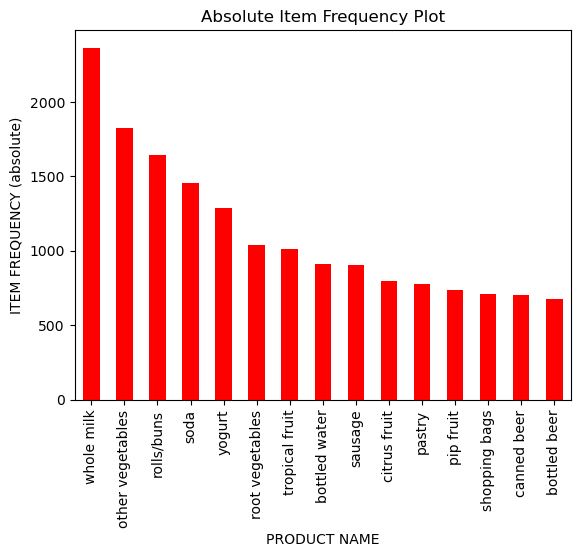

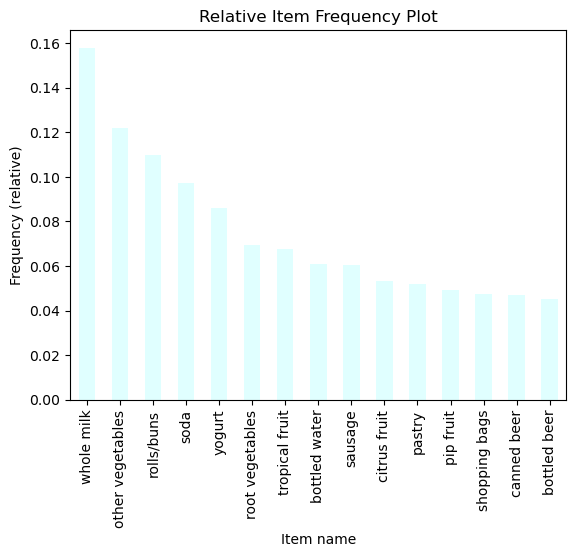

In [3]:
# Get item frequency (absolute)
item_counts = data.sum(axis=0).sort_values(ascending=False)

# Plotting absolute item frequency
item_counts[:15].plot(kind='bar', color='red', xlabel='PRODUCT NAME', ylabel='ITEM FREQUENCY (absolute)', title='Absolute Item Frequency Plot')
plt.show()

# Plotting relative item frequency
(item_counts[:15] / len(data)).plot(kind='bar', color='lightcyan', xlabel='Item name', ylabel='Frequency (relative)', title='Relative Item Frequency Plot')
plt.show()

In [4]:
# Apply Apriori Algorithm
frequent_itemsets = apriori(data, min_support=0.0002, use_colnames=True, max_len=4)

# Generate rules with specified support, confidence, and target item
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)
rules = rules[rules['consequents'].apply(lambda x: 'whole milk' in x)]

# Sort and display rules by lift
rules_sorted = rules.sort_values(by='lift', ascending=False)
print(rules_sorted)

                                         antecedents   consequents  \
0                         (processed cheese, butter)  (whole milk)   
1                 (domestic eggs, canned vegetables)  (whole milk)   
2                             (flower (seeds), pork)  (whole milk)   
4                (house keeping products, margarine)  (whole milk)   
5         (house keeping products, other vegetables)  (whole milk)   
9                (citrus fruit, canned beer, yogurt)  (whole milk)   
10             (hygiene articles, canned beer, soda)  (whole milk)   
11             (canned beer, yogurt, tropical fruit)  (whole milk)   
15  (citrus fruit, other vegetables, tropical fruit)  (whole milk)   
16    (citrus fruit, whipped/sour cream, rolls/buns)  (whole milk)   
25                     (rolls/buns, pastry, sausage)  (whole milk)   
23                  (pastry, other vegetables, soda)  (whole milk)   
6                         (processed cheese, pastry)  (whole milk)   

    antecedent supp

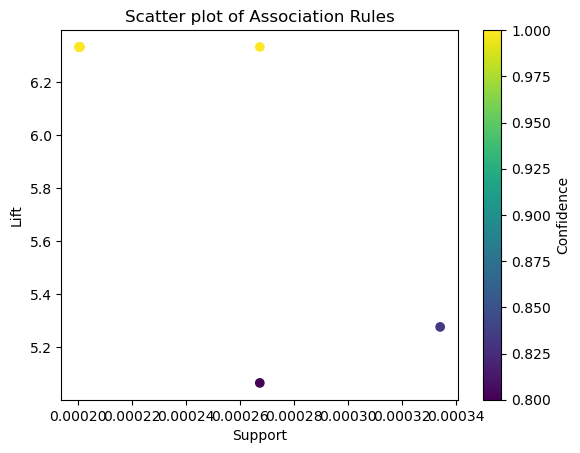

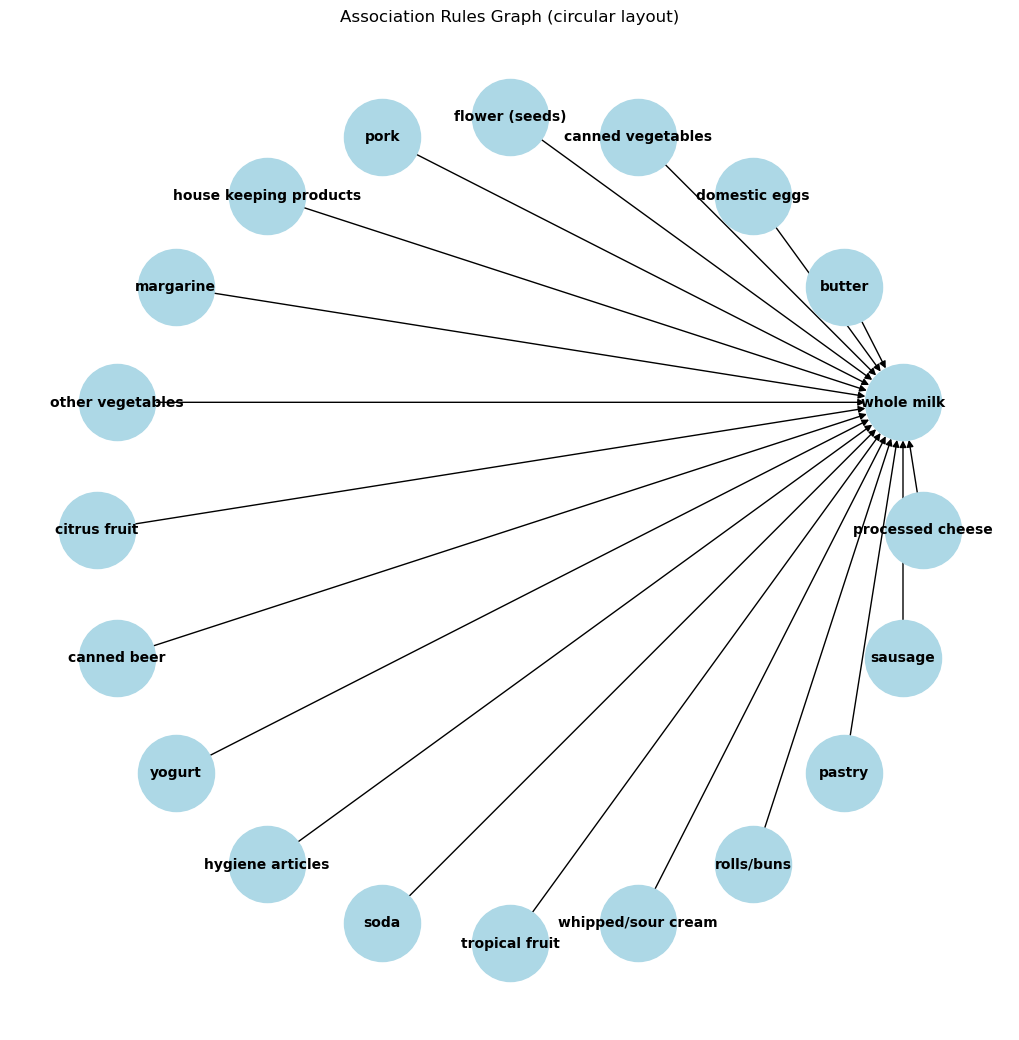

In [5]:
# Scatter plot of association rules
plt.scatter(rules_sorted['support'], rules_sorted['lift'], c=rules_sorted['confidence'], cmap='viridis')
plt.colorbar(label='Confidence')
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Scatter plot of Association Rules')
plt.show()

# Graph visualization using networkx (similar to circular graph in arulesViz)
import networkx as nx

# Creating a graph visualization
G = nx.DiGraph()

for _, rule in rules_sorted.iterrows():
    for antecedent in rule['antecedents']:
        for consequent in rule['consequents']:
            G.add_edge(antecedent, consequent, weight=rule['confidence'])

plt.figure(figsize=(10, 10))
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
plt.title('Association Rules Graph (circular layout)')
plt.show()

In [6]:
# Remove redundant rules
non_redundant_rules = rules_sorted[~rules_sorted.duplicated(subset=['antecedents', 'consequents'], keep='first')]

# Display top 10 rules after removing redundancy
print(non_redundant_rules.head(10))

# Summary of rules
summary = non_redundant_rules.describe()
print(summary)

                                         antecedents   consequents  \
0                         (processed cheese, butter)  (whole milk)   
1                 (domestic eggs, canned vegetables)  (whole milk)   
2                             (flower (seeds), pork)  (whole milk)   
4                (house keeping products, margarine)  (whole milk)   
5         (house keeping products, other vegetables)  (whole milk)   
9                (citrus fruit, canned beer, yogurt)  (whole milk)   
10             (hygiene articles, canned beer, soda)  (whole milk)   
11             (canned beer, yogurt, tropical fruit)  (whole milk)   
15  (citrus fruit, other vegetables, tropical fruit)  (whole milk)   
16    (citrus fruit, whipped/sour cream, rolls/buns)  (whole milk)   

    antecedent support  consequent support   support  confidence      lift  \
0             0.000200            0.157923  0.000200         1.0  6.332205   
1             0.000200            0.157923  0.000200         1.0  6.33220

c:\Users\M salim\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
